In [9]:
import pandas as pd
import dfply as df
import numpy as np

In [2]:
mdp = pd.read_excel('./mpd2020.xlsx', sheet_name='Full data')

In [16]:
@df.pipe
@df.group_delegation
def calc_rank_arg(data):
    s_data = data.sort_values('gdppc')
    s_data['rank'] = np.arange(s_data.shape[0])
    s_data['count'] = s_data.shape[0]
    return s_data >> df.mask(df.X.country == 'Argentina')

In [17]:
rankings_arg = (
    mdp.dropna()
    >> df.group_by('year')
    >> calc_rank_arg()
    >> df.gather('type', 'value', ['rank', 'count'])
)

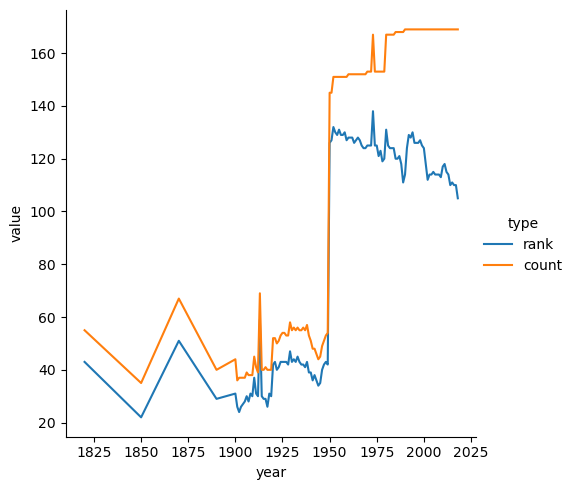

In [18]:
sns.relplot(rankings_arg, x='year', y='value', hue='type', kind='line')

In [10]:
(mdp >> df.mask(df.X.year == 2010) >> df.arrange('gdppc') >> df.mutate(rank=np.arange(df.X.shape[0])))

ValueError: invalid __array_struct__